Max NDSI： 1.0881659987424337
Min NDSI： -0.6241071111996007
OTSU threshold NDSI： 0.2621279945321162
Max NDSI_RES： 0.95099878598692
Min NDSI_RES： -0.5697617659773301
OTSU threshold NDSI_RES： 0.37774334354727096


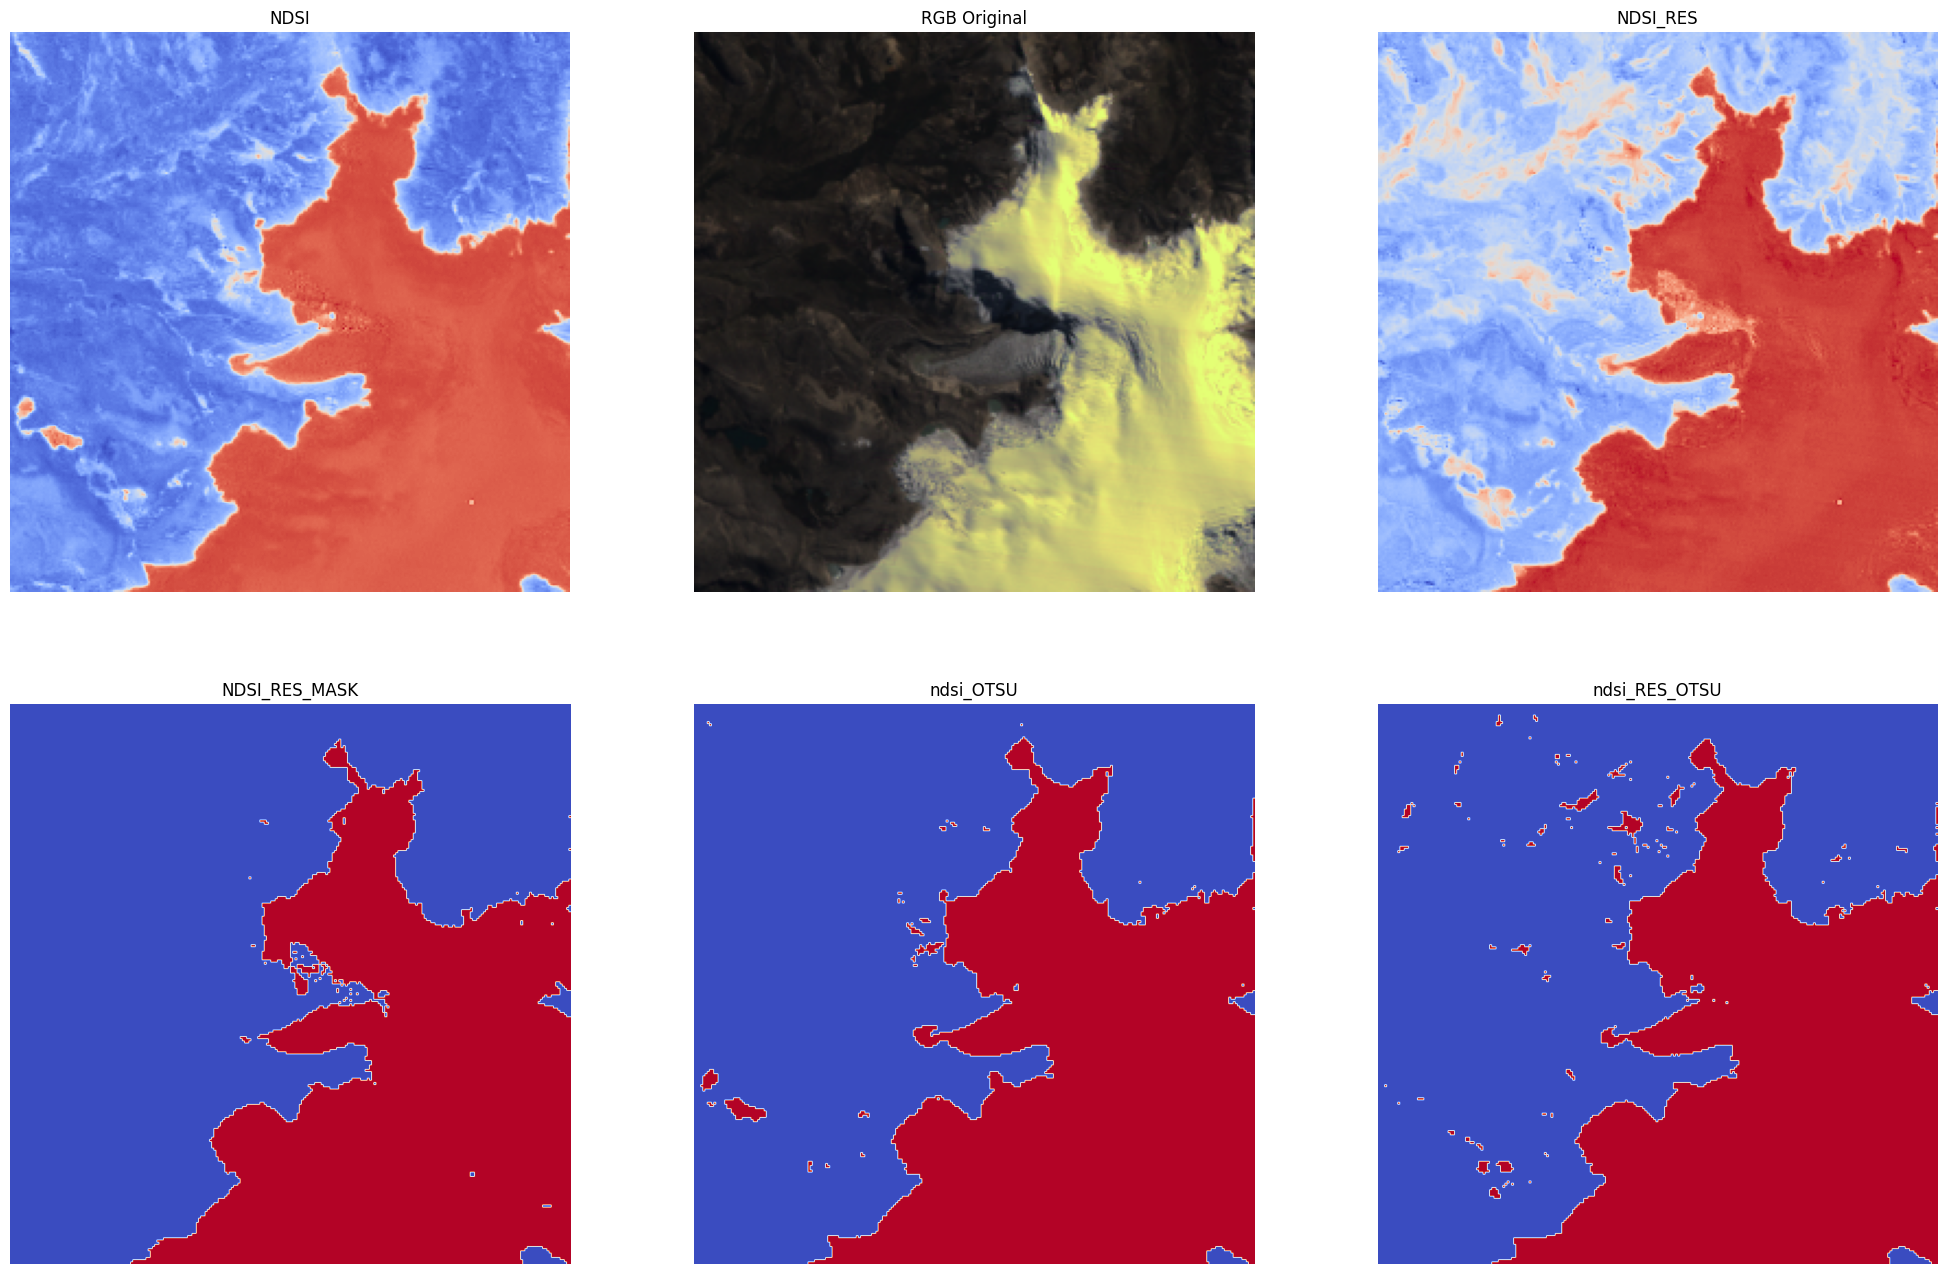

In [3]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

image_path="/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/Recortar_patchs_L5/1991/images/LT04_L1TP_003070_19910531_20200915_02_T1_001_001.TIF"
#image_path="/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Glaciar_data_L5/images_data/LT05_L1TP_003070_19930629_20200914_02_T1_006_015.TIF"

with rasterio.open(image_path) as src:
    swir = src.read(5)
    #swir = np.clip(swir, 0, 1)
    nir = src.read(4)
    #nir = np.clip(nir, 0, 1)
    band_red = src.read(3)
    #band_red = np.clip(band_red, 0, 1)
    band_green = src.read(2)
    #band_green = np.clip(band_green, 0, 1)
    band_blue = src.read(1)
    #band_blue = np.clip(band_blue, 0, 1)

# Crear una imagen RGB
rgb = np.dstack((band_red, band_green, band_blue))

def calculate_ndsi(green, swir):
    den=green+swir
    den[den == 0]=np.nan
    return np.divide(green-swir, den, out = np.zeros_like(green), where=den != 0)

def calculate_ndwi(green, nir):
    den=green+nir
    den[den == 0]=np.nan
    return np.divide(green-nir, den, out = np.zeros_like(green), where=den != 0)
#NDSI=calculate_ndsi(band_green, swir).astype(np.float64)
NDSI=calculate_ndsi(band_green, swir).astype(np.float64)
NDWI=calculate_ndwi(band_green, nir).astype(np.float64)

NDSI_RES=NDSI-NDWI

threshold_value_ndsi = filters.threshold_otsu(NDSI)
print("============================================")
print("Max NDSI：", np.max(NDSI))
print("Min NDSI：", np.min(NDSI))
print("OTSU threshold NDSI：", threshold_value_ndsi)
binary_ndsi = np.where(NDSI > threshold_value_ndsi, 255, 0).astype(np.uint8)

threshold_value_ndsi_res = filters.threshold_otsu(NDSI_RES)
print("============================================")
print("Max NDSI_RES：", np.max(NDSI_RES))
print("Min NDSI_RES：", np.min(NDSI_RES))
print("OTSU threshold NDSI_RES：", threshold_value_ndsi_res)
binary_ndsi_res = np.where(NDSI_RES > threshold_value_ndsi_res, 255, 0).astype(np.uint8)


#ndsi1_threshold = 0.32
ndsi1_threshold = 0.67
# Crear máscara binaria
mask_ndsi = np.where(NDSI_RES > ndsi1_threshold, 255, 0).astype(np.uint8)

# Mostrar la imagen RGB original y la ajustada
fig, ax = plt.subplots(2, 3, figsize=(25, 16))


ax[0,0].imshow(NDSI, cmap='coolwarm')
ax[0,0].set_title('NDSI')
ax[0,0].axis('off')

ax[0,1].imshow(rgb / np.max(rgb))
ax[0,1].set_title('RGB Original')
ax[0,1].axis('off')

ax[0,2].imshow(NDSI_RES, cmap='coolwarm')
ax[0,2].set_title('NDSI_RES')
ax[0,2].axis('off')


ax[1,0].imshow(mask_ndsi, cmap='coolwarm')
ax[1,0].set_title('NDSI_RES_MASK')
ax[1,0].axis('off')

ax[1,1].imshow(binary_ndsi, cmap='coolwarm')
ax[1,1].set_title('ndsi_OTSU')
ax[1,1].axis('off')

ax[1,2].imshow(binary_ndsi_res, cmap='coolwarm')
ax[1,2].set_title('ndsi_RES_OTSU')
ax[1,2].axis('off')

plt.show()



LANDSAT 5

Max NDSI： 1.2391441192653823
Min NDSI： -0.6591293272645646
OTSU threshold NDSI： 0.249224177422617
Max NDSI_RES： 1.0069360563615266
Min NDSI_RES： -0.46985099884253323
OTSU threshold NDSI_RES： 0.36372606942694585


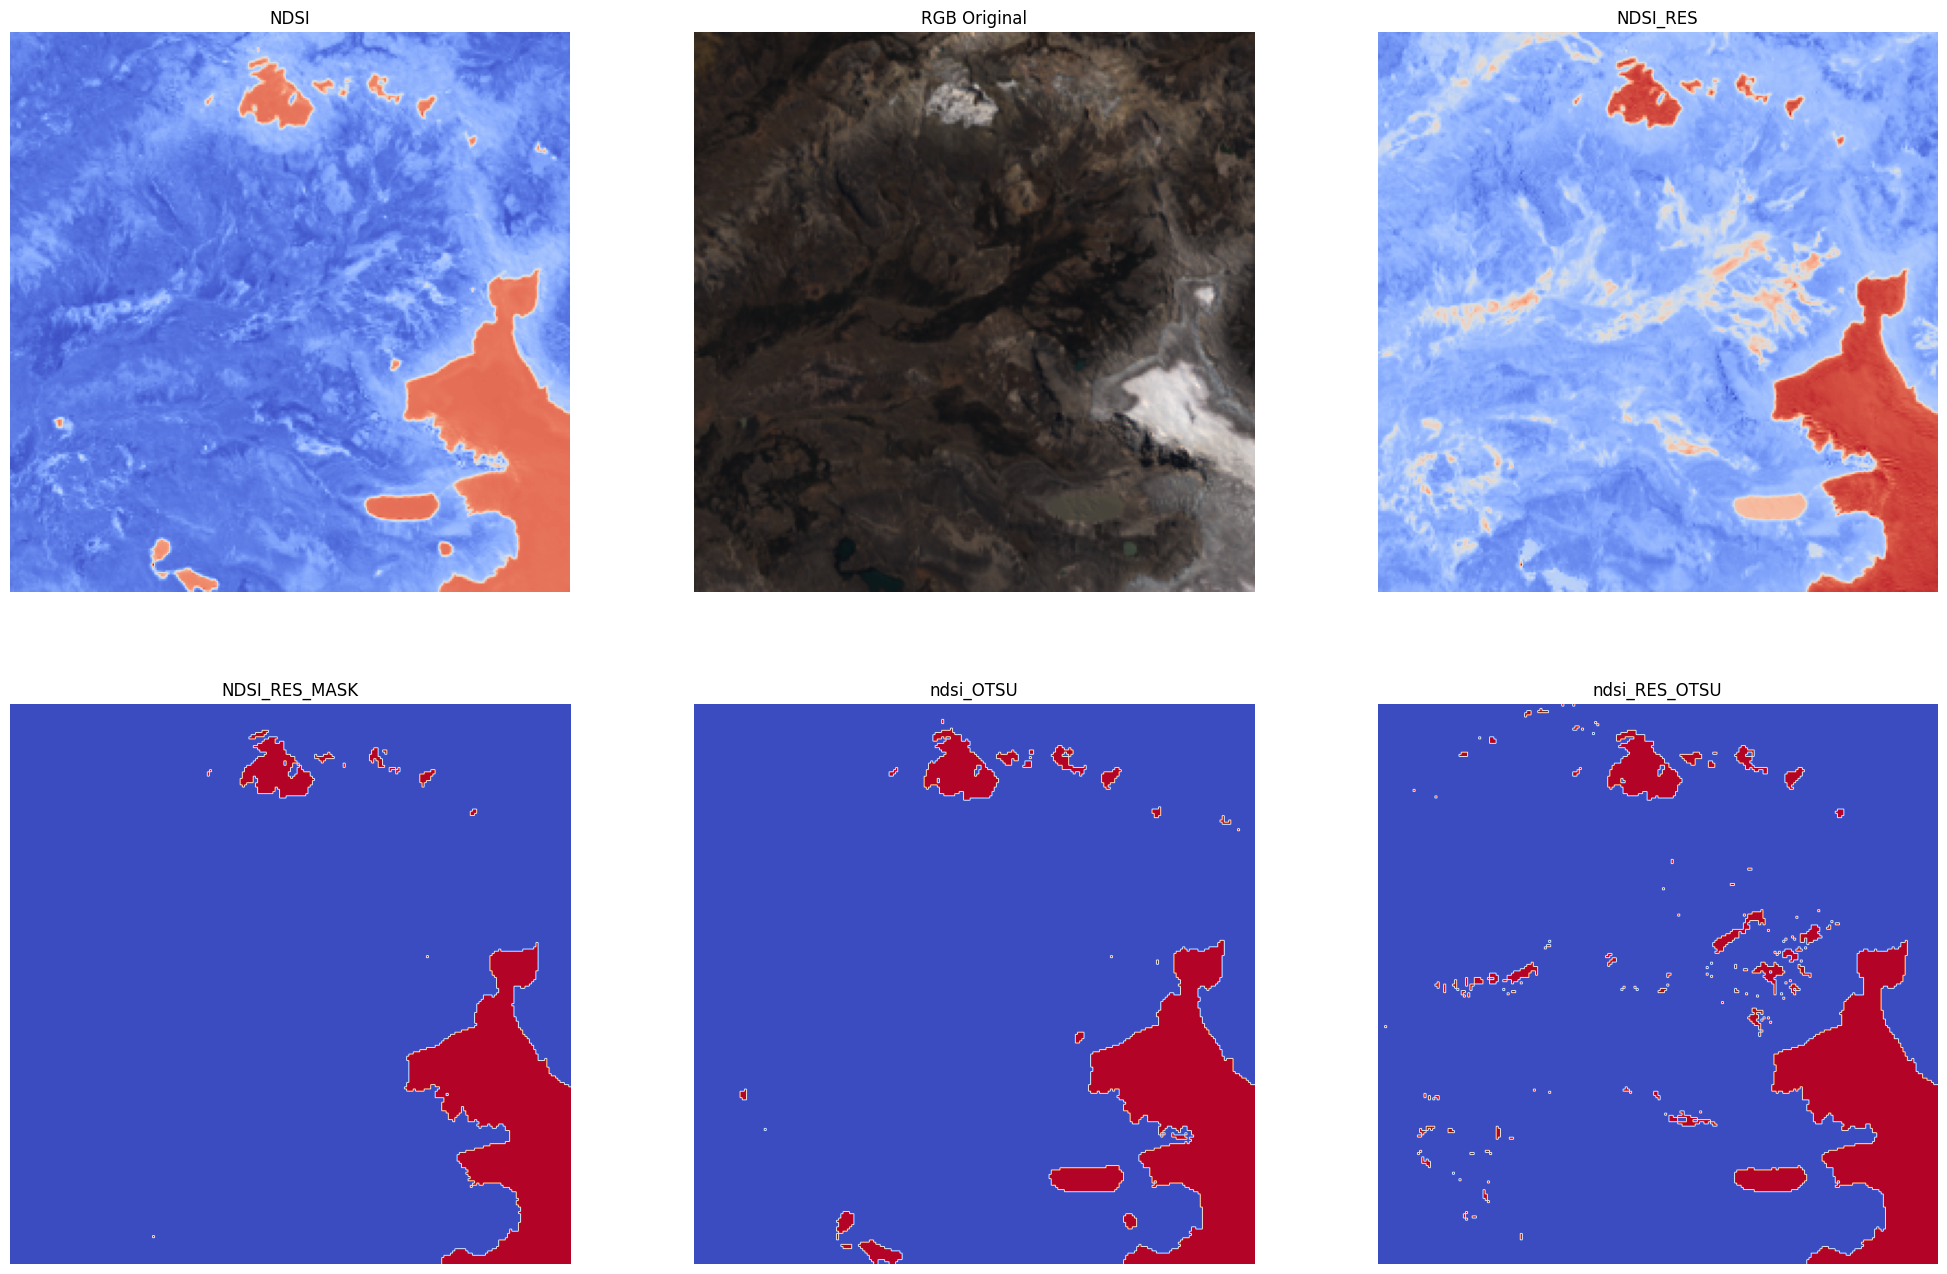

In [3]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
#input_dir="/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/RECORTE_GEE_LT05_L1TP_003070_19910531/images/RECORTE_GEE_LT05_L1TP_003070_19910531_001_001.TIF"
#output_dir = '/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/RECORTE_GEE_LT05_L1TP_003070_19910531/masks/'
image_path="/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/2024/images/2024_001_001.TIF"
with rasterio.open(image_path) as src:
    swir = src.read(5)
    #swir = np.clip(swir, 0, 1)
    nir = src.read(4)
    #nir = np.clip(nir, 0, 1)
    band_red = src.read(3)
    #band_red = np.clip(band_red, 0, 1)
    band_green = src.read(2)
    #band_green = np.clip(band_green, 0, 1)
    band_blue = src.read(1)
    #band_blue = np.clip(band_blue, 0, 1)

# Crear una imagen RGB
rgb = np.dstack((band_red, band_green, band_blue))

def calculate_ndsi(green, swir):
    den=green+swir
    den[den == 0]=np.nan
    return np.divide(green-swir, den, out = np.zeros_like(green), where=den != 0)

def calculate_ndwi(green, nir):
    den=green+nir
    den[den == 0]=np.nan
    return np.divide(green-nir, den, out = np.zeros_like(green), where=den != 0)
#NDSI=calculate_ndsi(band_green, swir).astype(np.float64)
NDSI=calculate_ndsi(band_green, swir).astype(np.float64)
NDWI=calculate_ndwi(band_green, nir).astype(np.float64)

NDSI_RES=NDSI-NDWI

threshold_value_ndsi = filters.threshold_otsu(NDSI)
print("============================================")
print("Max NDSI：", np.max(NDSI))
print("Min NDSI：", np.min(NDSI))
print("OTSU threshold NDSI：", threshold_value_ndsi)
binary_ndsi = np.where(NDSI > threshold_value_ndsi, 255, 0).astype(np.uint8)

threshold_value_ndsi_res = filters.threshold_otsu(NDSI_RES)
print("============================================")
print("Max NDSI_RES：", np.max(NDSI_RES))
print("Min NDSI_RES：", np.min(NDSI_RES))
print("OTSU threshold NDSI_RES：", threshold_value_ndsi_res)
binary_ndsi_res = np.where(NDSI_RES > threshold_value_ndsi_res, 255, 0).astype(np.uint8)


#ndsi1_threshold = 0.32
ndsi1_threshold = 0.683
# Crear máscara binaria
mask_ndsi = np.where(NDSI_RES > ndsi1_threshold, 255, 0).astype(np.uint8)
#mask_ndsi = np.where(NDSI > ndsi1_threshold, 255, 0).astype(np.uint8)

# Mostrar la imagen RGB original y la ajustada
fig, ax = plt.subplots(2, 3, figsize=(25, 16))


ax[0,0].imshow(NDSI, cmap='coolwarm')
ax[0,0].set_title('NDSI')
ax[0,0].axis('off')

ax[0,1].imshow(rgb / np.max(rgb))
ax[0,1].set_title('RGB Original')
ax[0,1].axis('off')

ax[0,2].imshow(NDSI_RES, cmap='coolwarm')
ax[0,2].set_title('NDSI_RES')
ax[0,2].axis('off')


ax[1,0].imshow(mask_ndsi, cmap='coolwarm')
ax[1,0].set_title('NDSI_RES_MASK')
ax[1,0].axis('off')

ax[1,1].imshow(binary_ndsi, cmap='coolwarm')
ax[1,1].set_title('ndsi_OTSU')
ax[1,1].axis('off')

ax[1,2].imshow(binary_ndsi_res, cmap='coolwarm')
ax[1,2].set_title('ndsi_RES_OTSU')
ax[1,2].axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max NDSI： 1.244525547445255
Min NDSI： -0.7014660151043979
OTSU threshold NDSI： 0.24492441277619503
Max NDSI_RES： 9.458285605192833
Min NDSI_RES： -10.481117474075258
OTSU threshold NDSI_RES： 0.3842994382602827


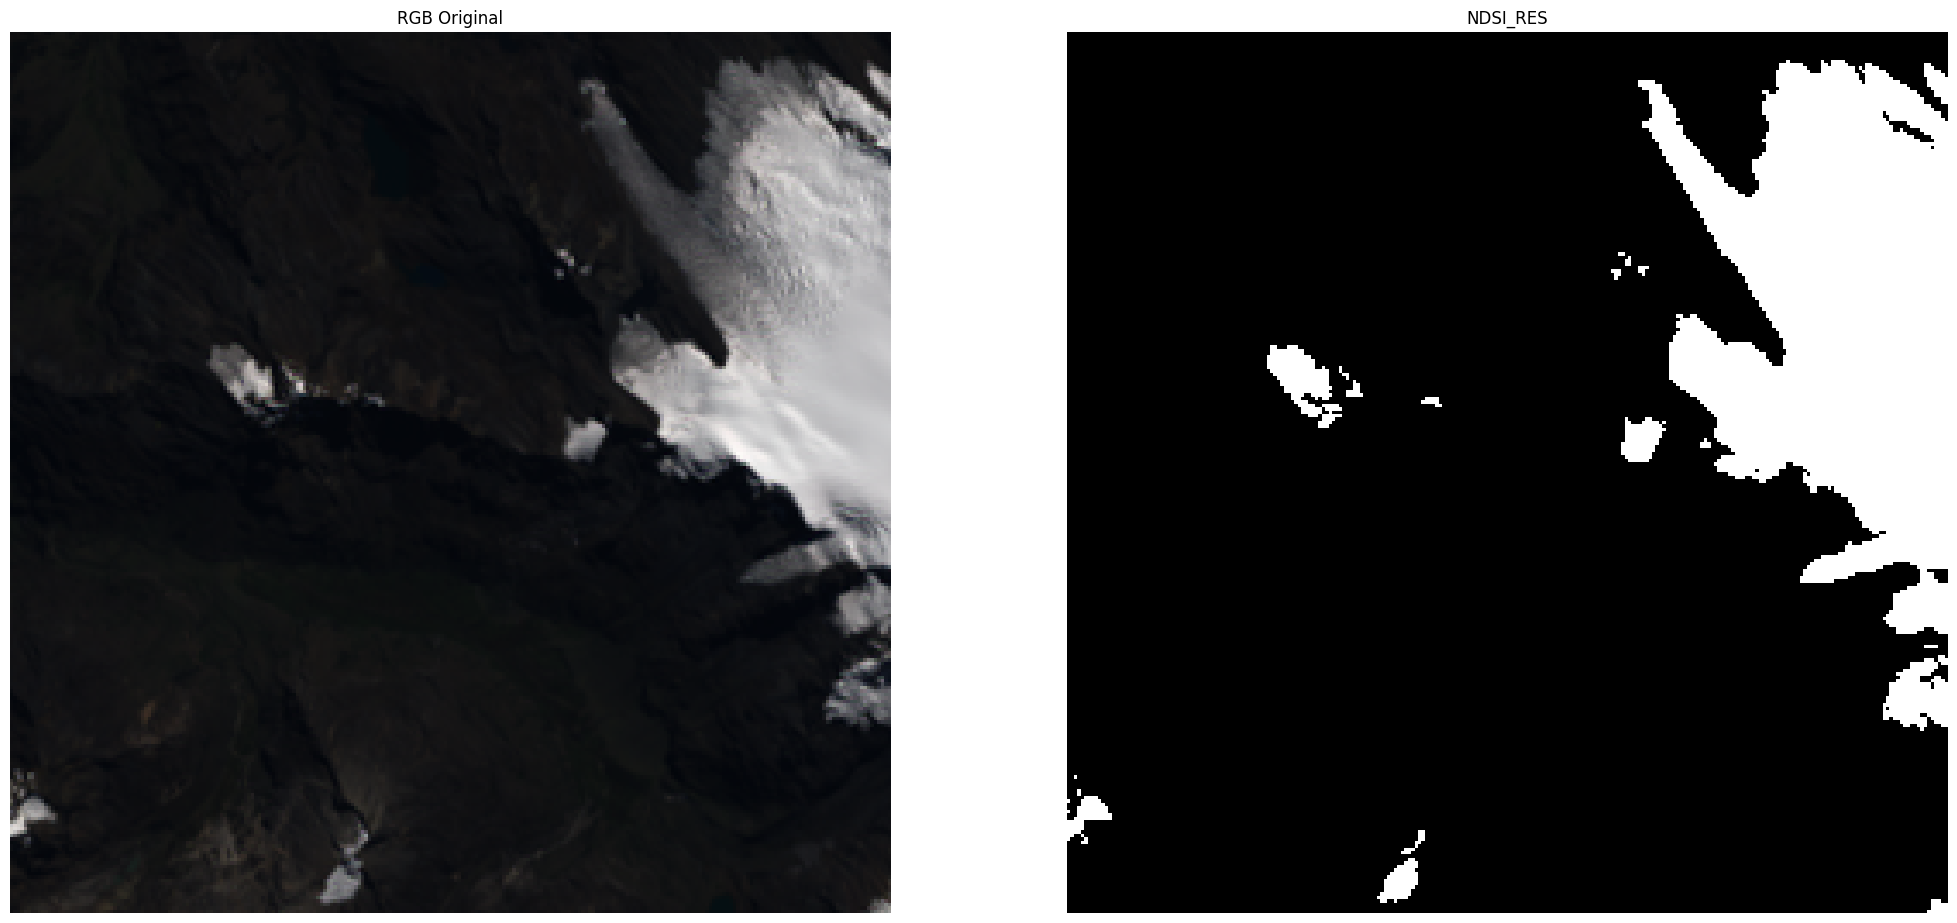

In [4]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
#input_dir="/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/RECORTE_GEE_LT05_L1TP_003070_19910531/images/RECORTE_GEE_LT05_L1TP_003070_19910531_001_001.TIF"
#output_dir = '/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/RECORTE_GEE_LT05_L1TP_003070_19910531/masks/'
image_path="/home/cornelius/Documentos/Glaciar_dataset_C2_L1/glaciar_data_L5_L8/glaciar_data_L5L8/training/images/LC08_L1TP_008066_20190608_20200828_02_T1_022_013.TIF"
with rasterio.open(image_path) as src:
    swir = src.read(5)
    #swir = np.clip(swir, 0, 1)
    nir = src.read(4)
    #nir = np.clip(nir, 0, 1)
    band_red = src.read(3)
    #band_red = np.clip(band_red, 0, 1)
    band_green = src.read(2)
    #band_green = np.clip(band_green, 0, 1)
    band_blue = src.read(1)
    #band_blue = np.clip(band_blue, 0, 1)

# Crear una imagen RGB
rgb = np.dstack((band_red, band_green, band_blue))

def calculate_ndsi(green, swir):
    den=green+swir
    den[den == 0]=np.nan
    return np.divide(green-swir, den, out = np.zeros_like(green), where=den != 0)

def calculate_ndwi(green, nir):
    den=green+nir
    den[den == 0]=np.nan
    return np.divide(green-nir, den, out = np.zeros_like(green), where=den != 0)
#NDSI=calculate_ndsi(band_green, swir).astype(np.float64)
NDSI=calculate_ndsi(band_green, swir).astype(np.float64)
NDWI=calculate_ndwi(band_green, nir).astype(np.float64)

NDSI_RES=NDSI-NDWI

threshold_value_ndsi = filters.threshold_otsu(NDSI)
print("============================================")
print("Max NDSI：", np.max(NDSI))
print("Min NDSI：", np.min(NDSI))
print("OTSU threshold NDSI：", threshold_value_ndsi)
binary_ndsi = np.where(NDSI > threshold_value_ndsi, 255, 0).astype(np.uint8)

threshold_value_ndsi_res = filters.threshold_otsu(NDSI_RES)
print("============================================")
print("Max NDSI_RES：", np.max(NDSI_RES))
print("Min NDSI_RES：", np.min(NDSI_RES))
print("OTSU threshold NDSI_RES：", threshold_value_ndsi_res)
binary_ndsi_res = np.where(NDSI_RES > threshold_value_ndsi_res, 255, 0).astype(np.uint8)


#ndsi1_threshold = 0.32
ndsi1_threshold = 0.683
# Crear máscara binaria
mask_ndsi = np.where(NDSI_RES > ndsi1_threshold, 255, 0).astype(np.uint8)
#mask_ndsi = np.where(NDSI > ndsi1_threshold, 255, 0).astype(np.uint8)

# Mostrar la imagen RGB original y la ajustada
fig, ax = plt.subplots(1, 2, figsize=(25, 16))

ax[0].imshow(rgb / np.max(rgb))
ax[0].set_title('RGB Original')
ax[0].axis('off')

ax[1].imshow(mask_ndsi, cmap='gray')
ax[1].set_title('NDSI_RES')
ax[1].axis('off')

plt.show()

In [8]:
a1 = 8337600+6630300+19346400+9411300
print(a1)
a2 = 10537200+17653500+8106300+7332300
print(a2)
a3 = 10536300+17650800+8100000+7336800
print(a3)

43725600
43629300
43623900
